<a href="https://colab.research.google.com/github/hongkwangpyo/2020_deep_learning/blob/master/0811_3_keras_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/My Drive/Colab Notebooks/train'

ad  normal


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [5]:
np.random.seed(3)
tf.random.set_seed(3)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/train',
    target_size = (150, 150),
    batch_size=5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/test',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import VGG16

In [9]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [10]:
from tensorflow.keras import models, layers, optimizers, metrics
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten()) 
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))

In [11]:
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
finetune_model.compile(loss='sparse_categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

In [ ]:
history = finetune_model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=100,
    validation_data = test_generator,
    validation_steps=10
)

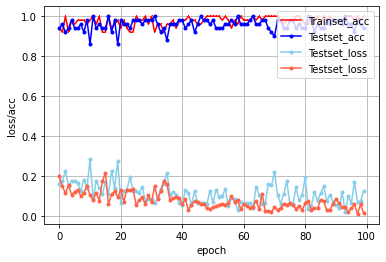

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker=',', c='r', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='b', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='skyblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='tomato', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()